### 09. Compare radiance to reflectance conversion factors
#### Gayantha R. L. Kodikara, 13/09/2023 @ UWM Update 08/03/2024, 31/05/2024

In [3]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from osgeo import gdal

In [4]:
# ReferenceImage has five colums and five rows. Seven columns are WL,MP1B,MP1W,MP2B,MP2W,MP3B,MP3W. Rows indicate B1,B2,B3,B4,and B5 Bands.
RadiancePanel = np.load('Radiance3Panels.npy')
RadiancePanel.shape

(5, 7)

In [5]:
# ReferenceImage has two colums and five rows. Two columns are WL (Wavelength), MBS(Mean Black-Spectra)and 
# MWS(Mean White-Spectra). Rows indicate B1,B2,B3,B4,and B5 Bands.
ReflectancePanel = np.load('ReflectancePanel.npy')
ReflectancePanel.shape

(5, 3)

In [6]:
Combine = np.hstack((RadiancePanel,ReflectancePanel[:,1:3]))
Combine.shape

(5, 9)

In [7]:
# Combine 2d array contain, Columns: WL,MP1B,MP1W,MP2B,MP2W,MP3B,MP3W,MBS,MWS. Rows: B1,B2,B3,B4, and B5
Combine

array([[4.75000000e+02, 3.70399989e-02, 8.79999995e-02, 2.91200001e-02,
        8.79999995e-02, 3.20400000e-02, 8.19999948e-02, 4.66712279e-02,
        5.44809479e-01],
       [5.60000000e+02, 3.87200005e-02, 1.28999993e-01, 3.22000012e-02,
        1.28999993e-01, 3.68399993e-02, 1.22000001e-01, 4.31325030e-02,
        5.22613797e-01],
       [6.68000000e+02, 3.84799987e-02, 1.29999995e-01, 3.20400000e-02,
        1.28919989e-01, 3.18400003e-02, 1.23999998e-01, 4.46042925e-02,
        5.41990936e-01],
       [8.40000000e+02, 7.15200007e-02, 1.05999991e-01, 6.36800006e-02,
        1.05999991e-01, 6.40400052e-02, 9.29599926e-02, 2.11278479e-01,
        5.56544852e-01],
       [7.17000000e+02, 3.39200012e-02, 1.14000008e-01, 2.97999997e-02,
        1.13959998e-01, 2.81600002e-02, 1.04000002e-01, 5.26647139e-02,
        5.46061179e-01]])

In [10]:
# Correction factor for Band 1 using panel 1
B1P1 = np.polyfit(Combine[0,1:3], Combine[0,7:9],1)
B1P1d = np.poly1d(B1P1)
B1P1d

poly1d([ 9.77508331, -0.31539785])

In [11]:
# Correction factor for Band 1 using panel 2
B1P2 = np.polyfit(Combine[0,3:5], Combine[0,7:9],1)
B1P2d = np.poly1d(B1P2)
B1P2d

poly1d([ 8.46022853, -0.19969063])

In [12]:
# Correction factor for Band 1 using panel 3
B1P3 = np.polyfit(Combine[0,5:7], Combine[0,7:9],1)
B1P3d = np.poly1d(B1P3)
B1P3d

poly1d([ 9.97074265, -0.27279137])

In [13]:
# Correction factor for Band 2 using panel 1
B2P1 = np.polyfit(Combine[1,1:3], Combine[1,7:9],1)
B2P1d = np.poly1d(B2P1)
B2P1d

poly1d([ 5.31104711, -0.16251124])

In [14]:
# Correction factor for Band 2 using panel 2
B2P2 = np.polyfit(Combine[1,3:5], Combine[1,7:9],1)
B2P2d = np.poly1d(B2P2)
B2P2d

poly1d([ 4.95331956, -0.11636439])

In [15]:
# Correction factor for Band 2 using panel 3
B2P3 = np.polyfit(Combine[1,5:7], Combine[1,7:9],1)
B2P3d = np.poly1d(B2P3)
B2P3d

poly1d([ 5.63035794, -0.16428988])

In [16]:
# Correction factor for Band 3 using panel 1
B3P1 = np.polyfit(Combine[2,1:3], Combine[2,7:9],1)
B3P1d = np.poly1d(B3P1)
B3P1d

poly1d([ 5.43473189, -0.16452418])

In [17]:
# Correction factor for Band 3 using panel 2
B3P2 = np.polyfit(Combine[2,3:5], Combine[2,7:9],1)
B3P2d = np.poly1d(B3P2)
B3P2d

poly1d([ 5.13404934, -0.11989065])

In [18]:
# Correction factor for Band 3 using panel 3
B3P3 = np.polyfit(Combine[2,5:7], Combine[2,7:9],1)
B3P3d = np.poly1d(B3P3)
B3P3d

poly1d([ 5.39699062, -0.12723589])

In [19]:
# Correction factor for Band 4 using panel 1
B4P1 = np.polyfit(Combine[3,1:3], Combine[3,7:9],1)
B4P1d = np.poly1d(B4P1)
B4P1d

poly1d([10.01352863, -0.5048891 ])

In [20]:
# Correction factor for Band 4 using panel 2
B4P2 = np.polyfit(Combine[3,3:5], Combine[3,7:9],1)
B4P2d = np.poly1d(B4P2)
B4P2d

poly1d([ 8.15846997, -0.30825289])

In [21]:
# Correction factor for Band 4 using panel 3
B4P3 = np.polyfit(Combine[3,5:7], Combine[3,7:9],1)
B4P3d = np.poly1d(B4P3)
B4P3d

poly1d([11.93867648, -0.55327442])

In [22]:
# Correction factor for Band 5 using panel 1
B5P1 = np.polyfit(Combine[4,1:3], Combine[4,7:9],1)
B5P1d = np.poly1d(B5P1)
B5P1d

poly1d([ 6.16129404, -0.15632639])

In [23]:
# Correction factor for Band 5 using panel 2
B5P2 = np.polyfit(Combine[4,3:5], Combine[4,7:9],1)
B5P2d = np.poly1d(B5P2)
B5P2d

poly1d([ 5.86260071, -0.12204079])

In [24]:
# Correction factor for Band 5 using panel 3
B5P3 = np.polyfit(Combine[4,5:7], Combine[4,7:9],1)
B5P3d = np.poly1d(B5P3)
B5P3d

poly1d([ 6.50575491, -0.13053735])

In [25]:
#BWP_Ref = np.vstack((Bx1,Bx2,Bx3,Bx4,Bx5))
#np.save('Pininj_0177_2pELM_coeff.npy',BWP_Ref)
#BWP_Ref

In [31]:
DLS = np.load('Pininj_0177_DLS_nopanel_coeff.npy')
DLS

array([[2.59589928, 0.        ],
       [2.80356569, 0.        ],
       [3.14147322, 0.        ],
       [6.09785102, 0.        ],
       [3.848637  , 0.        ]])

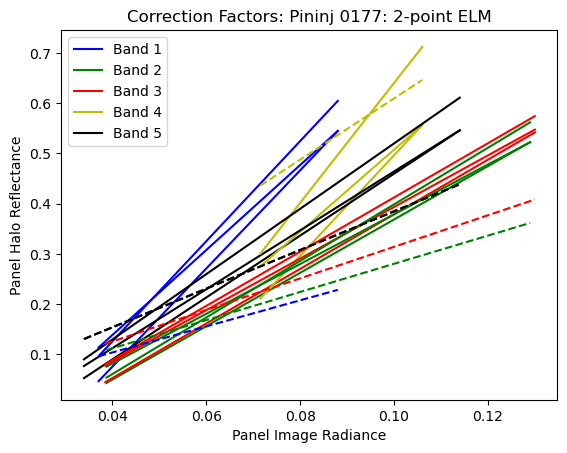

In [35]:
#Plot all the trend lines in one plot
#plt.scatter(Combine[0,3:5],Combine[0,1:3], color = 'r')
# Panel 1
plt.plot(Combine[0,1:3],B1P1d(Combine[0,1:3]), color = 'b', label = 'Band 1')
plt.plot(Combine[1,1:3],B2P1d(Combine[1,1:3]), color = 'g', label = 'Band 2')
plt.plot(Combine[2,1:3],B3P1d(Combine[2,1:3]), color = 'r', label = 'Band 3')
plt.plot(Combine[3,1:3],B4P1d(Combine[3,1:3]), color = 'y', label = 'Band 4')
plt.plot(Combine[4,1:3],B5P1d(Combine[4,1:3]), color = 'k', label = 'Band 5')
plt.plot(Combine[4,1:3],(Combine[4,1:3])* DLS[4,0] + DLS[4,1], color = 'k', linestyle = 'dashed')
# Panel 2
plt.plot(Combine[0,1:3],B1P2d(Combine[0,1:3]), color = 'b')
plt.plot(Combine[1,1:3],B2P2d(Combine[1,1:3]), color = 'g')
plt.plot(Combine[2,1:3],B3P2d(Combine[2,1:3]), color = 'r')
plt.plot(Combine[3,1:3],B4P2d(Combine[3,1:3]), color = 'y')
plt.plot(Combine[4,1:3],B5P2d(Combine[4,1:3]), color = 'k')
# Panel 3
plt.plot(Combine[0,1:3],B1P3d(Combine[0,1:3]), color = 'b')
plt.plot(Combine[1,1:3],B2P3d(Combine[1,1:3]), color = 'g')
plt.plot(Combine[2,1:3],B3P3d(Combine[2,1:3]), color = 'r')
plt.plot(Combine[3,1:3],B4P3d(Combine[3,1:3]), color = 'y')
plt.plot(Combine[4,1:3],B5P3d(Combine[4,1:3]), color = 'k')
# DLS 
plt.plot(Combine[0,1:3],(Combine[0,1:3])* DLS[0,0] + DLS[0,1], color = 'b', linestyle = 'dashed')
plt.plot(Combine[1,1:3],(Combine[1,1:3])* DLS[1,0] + DLS[1,1], color = 'g', linestyle = 'dashed')
plt.plot(Combine[2,1:3],(Combine[2,1:3])* DLS[2,0] + DLS[2,1], color = 'r', linestyle = 'dashed')
plt.plot(Combine[3,1:3],(Combine[3,1:3])* DLS[3,0] + DLS[3,1], color = 'y', linestyle = 'dashed')
plt.plot(Combine[4,1:3],(Combine[4,1:3])* DLS[4,0] + DLS[4,1], color = 'k', linestyle = 'dashed')
plt.xlabel('Panel Image Radiance')
plt.ylabel('Panel Halo Reflectance')
plt.title('Correction Factors: Pininj 0177: 2-point ELM')
plt.legend()
plt.savefig('Pininj_0177_2pELM_coeff.png', dpi = 300)
plt.show()